In [224]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [225]:
df=pd.read_csv("IRIS.csv")

In [226]:
df=df[['Petal.Length', 'Petal.Width']]

In [227]:
df

,Petal.Length,Petal.Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<Axes: xlabel='Petal.Length', ylabel='Petal.Width'>

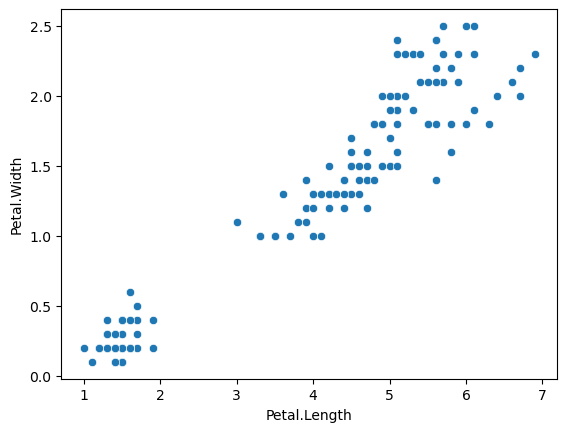

In [228]:
sns.scatterplot(x="Petal.Length",y="Petal.Width",data=df)

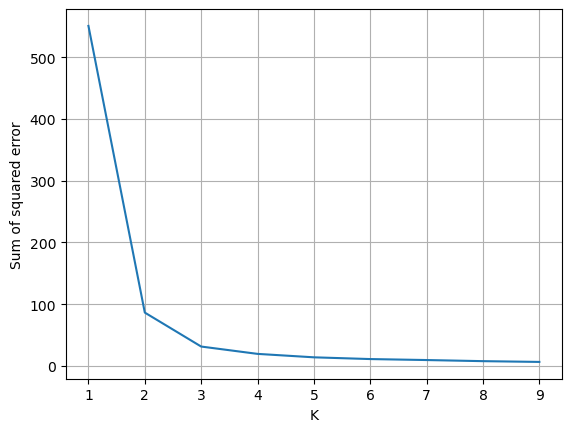

In [229]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Petal.Length','Petal.Width']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid(True)

In [232]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Petal.Length","Petal.Width"]])
df['cluster']=y_predicted
df.head()

,Petal.Length,Petal.Width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


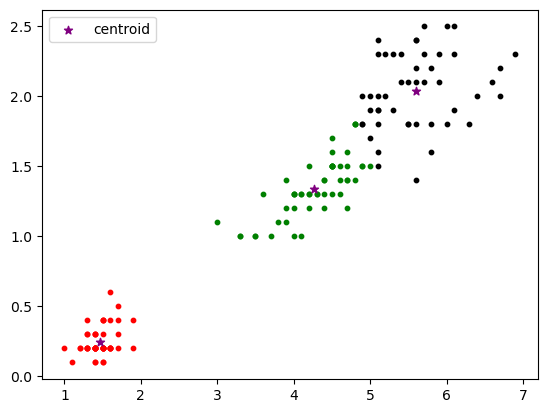

In [235]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],color='green',s=10)
plt.scatter(df2['Petal.Length'],df2['Petal.Width'],color='red',s=10)
plt.scatter(df3['Petal.Length'],df3['Petal.Width'],color='black',s=10)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') # This if for printing the Centroid
plt.legend()